<a href="https://colab.research.google.com/github/jourdee-lab/Data_-Analysis/blob/main/Assignment_1_CS2215_Jourdan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS2215 - Data Analytics for DH 2




# Part 1 - Dataset Load - 2021 Football statistics

This dataset contains the 2021 Football statistics with performance of over 500 players in leagues like the Premier League, Champions League, Laliga, Bundesliga, MLS and many more. It has mains statistics ranging from "Number of Goals" to the "Market Value in millions" for each player during the 2021 season. I reason I chose this dataset is because I love the variety of football teams we have and there is something special about exploring the different teams and their performances. The feeling of watching a player score a goal is just pure joy that always keep me entertained.



In [ ]:
#Loading libraries needed to map
import pandas as pd
import matplotlib.pyplot as plt
#Linking the csv file from github
df = pd.read_csv("https://raw.githubusercontent.com/JourdanGY/Uni_datasets/main/players.csv")



Print the relevant structural information of your dataset.




In [ ]:
df.dtypes

Unnamed: 0                       int64
Name                            object
Position                        object
Age                              int64
Markey Value In Millions(£)    float64
Country                         object
Club                            object
Matches                          int64
Goals                            int64
Own Goals                        int64
Assists                          int64
Yellow Cards                     int64
Second Yellow Cards              int64
Red Cards                        int64
Number Of Substitute In          int64
Number Of Substitute Out         int64
dtype: object

## Part 2 - Line Plot
I want to investigate the total cost of the market value of the top 10 teams relative to the number of goals during the season. I will use the line plot to display market value and total goals on the y-axis, which will give us a correlation between the two. I hope this analysis will give me a good performance indication of the amount spent for the teams for their goals.


[Text(0, 0, 'Bayern Munich'),
 Text(1, 0, 'Liverpool FC'),
 Text(2, 0, 'Manchester City'),
 Text(3, 0, 'RB Leipzig'),
 Text(4, 0, 'Real Madrid'),
 Text(5, 0, 'Borussia Dortmund'),
 Text(6, 0, 'Chelsea FC'),
 Text(7, 0, 'Manchester United'),
 Text(8, 0, 'AS Monaco'),
 Text(9, 0, 'SSC Napoli')]

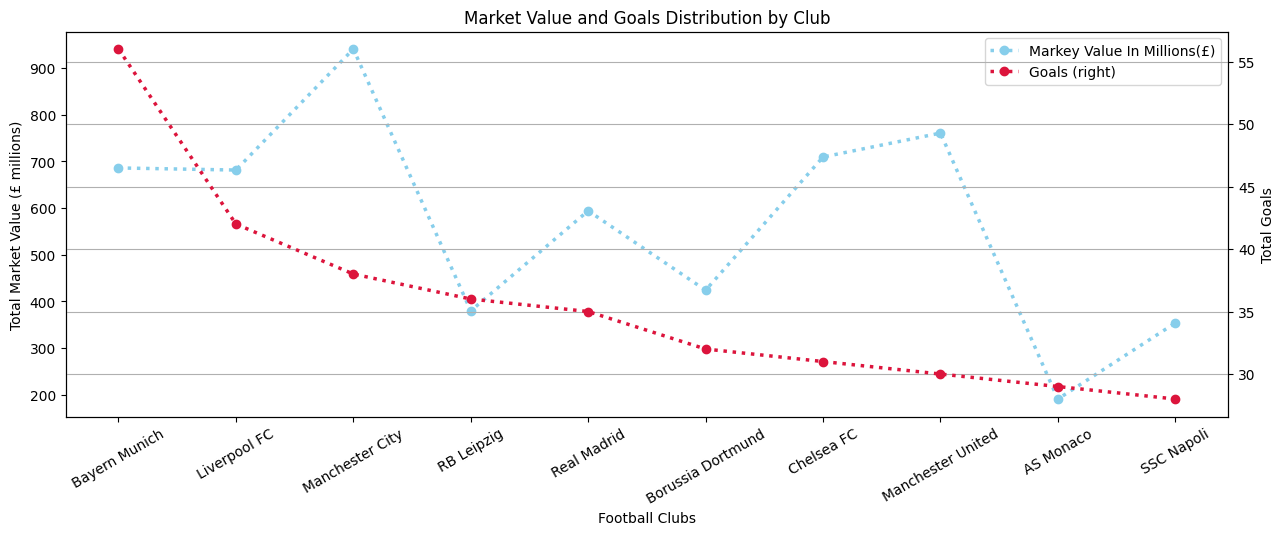

In [ ]:
# Grouping by "Club" and "Markey Value In Million" and then summing it.
# Which is then sorted by "Goals" in descending order and then using the .head method to get the top 10
football = df.groupby("Club")[["Markey Value In Millions(£)","Goals"]].sum().sort_values(by='Goals', ascending=False).head(10)
# Creating a new a variable called chart to plot the graph
chart = football.plot.line(
figsize=(15, 5),
secondary_y=['Goals'],
marker="o",
color=["skyblue", "crimson"],
title='Market Value and Goals Distribution by Club',
xlabel='Football Clubs',
ylabel='Total Goals',
linestyle=":",
linewidth=2.5,
grid=True,
rot=30)
# Naming the other y axis using the .set_ylabel method
chart.set_ylabel('Total Market Value (£ millions)')
# Setting the x-axis ticks and labels using football club names based in the len of the index
chart.set_xticks(range(len(football.index)))
chart.set_xticklabels(football.index)

From the results shown above, we can see that Bayern Munich stands out with an impressive goal tally of over 55, achieved with a comparatively modest market value of under 700 million. In contrast, looking at Manchester City, they have a boasting a staggering total market value exceeding 900 million with just only 37 goals. With heir goal count is relatively lower this difference could mean that their substantial investment in players hasn't really translated into goals. Furthermore, looking at RB Leipzig they have a significantly lower market value but a respectable goal amount. This highlights their exceptional efficiency in converting financial resources into on-field success.


## Part 3 - Bar Plot
I wish to investigate the distribution of goals across different positions on the field. I will utilise a bar chart to display the goals to get a better understanding on which positions would yield the most goals.


<Axes: title={'center': 'Position (based) Distribution of Goals'}, xlabel='Position', ylabel='Total Goals'>

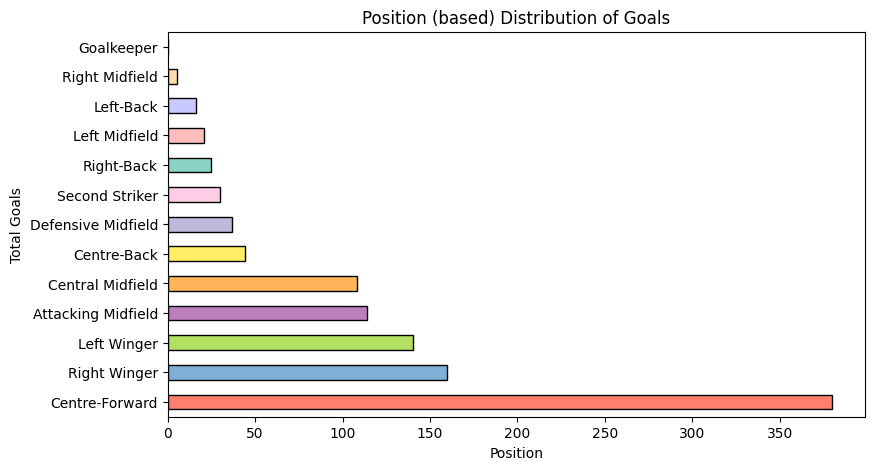

In [ ]:
# Using the groupby function and applying the .sum method to get the total sum, then using the sort_values to have it in descending order
#then using the .plot.bar to graph it
df.groupby("Position")["Goals"].sum().sort_values(ascending=False).plot.barh(
    title="Position (based) Distribution of Goals",
    xlabel="Position",
    ylabel="Total Goals",
    rot= 0,
    color=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7","#ffbdbd","#c9c9ff","#ffdbab"],
    edgecolor="black",
    figsize=(9, 5),
)

From these results, we can see that the centre-forward position has the highest number of goals with over 350 goals and the goalkeeper has the lowest amounts of goals in total. This result would make sense as the center-forward position is meant to be attacking the other goal while the goalkeeper is more focused on defending. However, one outlier in this graph would be the second striker as it has almost the same amount of goals as the right back. I think the low goal count is due to the second striker being a substitute for the main attacker. Overall, the goal distribution is just as expected considering the positional roles and responsibilities on the field.
